### Author: Kanika Saini

#### Importing all the necessary packages

In [1078]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as ss
from sklearn import preprocessing
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#### Importing the data from the local system into the Jupyter Notebook

In [1079]:
bank_add_full=pd.read_csv("bank-additional-full.csv",sep=";")

In [1080]:
dt=bank_add_full

#### Print the general information about the dataset and its attributes

In [1081]:
bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Printing the first few records of the data

In [1082]:
dt.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Print the statistics of the dataset

In [1083]:
dt.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Check for missing values. There seems to be no missing values in the dataset

In [1084]:
dt.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Exploratory Data Analysis

Correlation Matrix for categorical columns is calculated first using Cramers_V. It is measure that depicts the relationship between two categorical columns. It uses Pearson's chi-squared statistic.

In [1085]:
num_cols=dt._get_numeric_data().columns #getting all the categorical columns of the dataset
strin=[i for i in dt.columns if i not in num_cols] #storing them in a separate variable 

In [1086]:
cat_coeff=pd.DataFrame(columns=strin) #creating an empty dataframe to store the coefficients

In [1087]:
cat_coeff

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y


In [1088]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [1089]:
for i in cat_coeff: #iterating over the columns
    l=[]
    for j in cat_coeff:
        coeff=cramers_v(dt[i],dt[j]) #calculating the cramer's measure for the columns
        l.append(coeff)
    cat_coeff.loc[len(cat_coeff)]=l
cat_coeff.index=strin        #saving the coeffients in the dataframe

The following are the coefficients of the categorical columns. A heatmap can now be generated to visualize their corlealtion

In [1090]:
cat_coeff

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
job,1.000000,0.183590,0.359526,0.152101,0.010630,0.010218,0.127856,0.109835,0.016458,0.099560,0.151893
marital,0.183590,1.000000,0.116240,0.095434,0.009170,0.000000,0.071993,0.050174,0.010888,0.036630,0.053900
education,0.359526,0.116240,1.000000,0.170355,0.013316,0.000000,0.123302,0.094718,0.019725,0.042282,0.067220
default,0.152101,0.095434,0.170355,1.000000,0.010573,0.001567,0.135554,0.111926,0.011314,0.076628,0.099111
housing,0.010630,0.009170,0.013316,0.010573,1.000000,0.707852,0.084603,0.054243,0.014635,0.016958,0.009458
loan,0.010218,0.000000,0.000000,0.001567,0.707852,1.000000,0.024206,0.019830,0.006104,0.000000,0.000000
contact,0.127856,0.071993,0.123302,0.135554,0.084603,0.024206,0.999948,0.609087,0.054906,0.242419,0.144611
month,0.109835,0.050174,0.094718,0.111926,0.054243,0.019830,0.609087,1.000000,0.066569,0.242400,0.274000
day_of_week,0.016458,0.010888,0.019725,0.011314,0.014635,0.006104,0.054906,0.066569,1.000000,0.014579,0.023188
poutcome,0.099560,0.036630,0.042282,0.076628,0.016958,0.000000,0.242419,0.242400,0.014579,1.000000,0.320416


The heatmap below depicts the corelation between the features. The lighter the color, the more the corelation among the features. For instance, 'housing' and 'loan' are highly corelated which validates the fact that a person who has a home loan has a higher change of having a personal loan as well. There is correlation between the method of contact and the month as well but this relationship doesn't have a significant meaning. 
However, there is one interesting relationship between the previous campaign outcome (poutcome) and the target variable. The clients who have made a term deposit in the previous campaign are more likely to make a deposit in this campaign as well. 

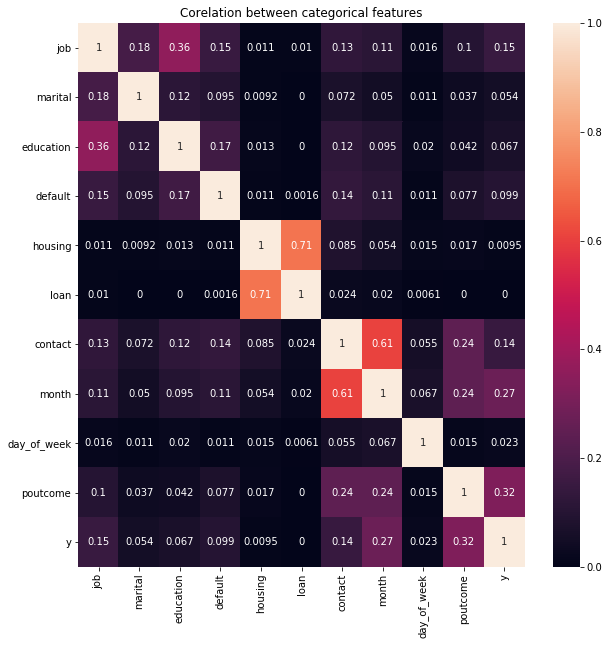

In [1091]:
plt.figure(figsize=(10,10)) #plot size
sns.heatmap(cat_coeff,annot=True).set_title("Corelation between categorical features")
plt.show()

The below correlation matrix visualizes the relationship between the numeric values. The features 'euribor3m' and  'emp.var.rate' seem to the very highest correlation between them. The Euro Interbank Offered Rate (Euribor) is highly dependent on the number of employees. as well The consumer price index also has a dependability with the employment variation rate, euribor3 and number of employees. 

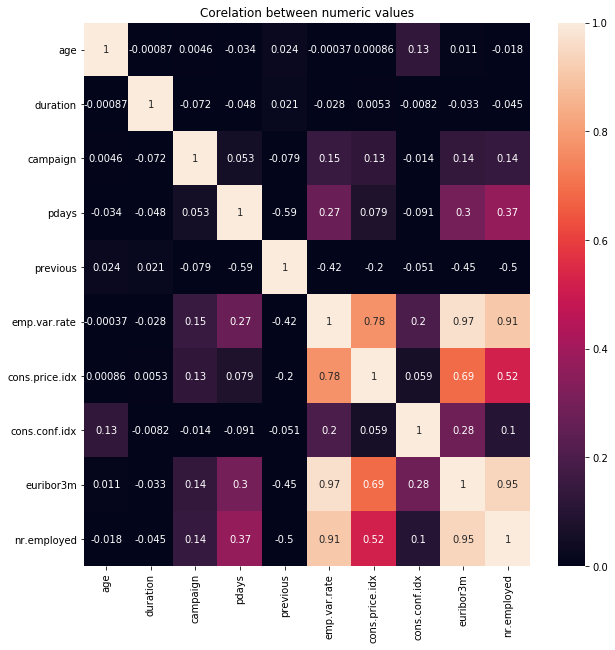

In [1092]:
plt.figure(figsize=(10,10))
sns.heatmap(dt.corr(),annot=True,vmin=0,vmax=1).set_title("Corelation between numeric values")
plt.show()

The visualization below shows the distribution of the age feature. It can be noted that there a lot of clients within the age range of 20-50. This age group has made the highest number of term deposits in the bank. At the same time, this age group has the highest number of clients who haven't made any deposits as well. 

Text(0.5, 1.0, 'Age Distribution with respect to making a term deposit (target)')

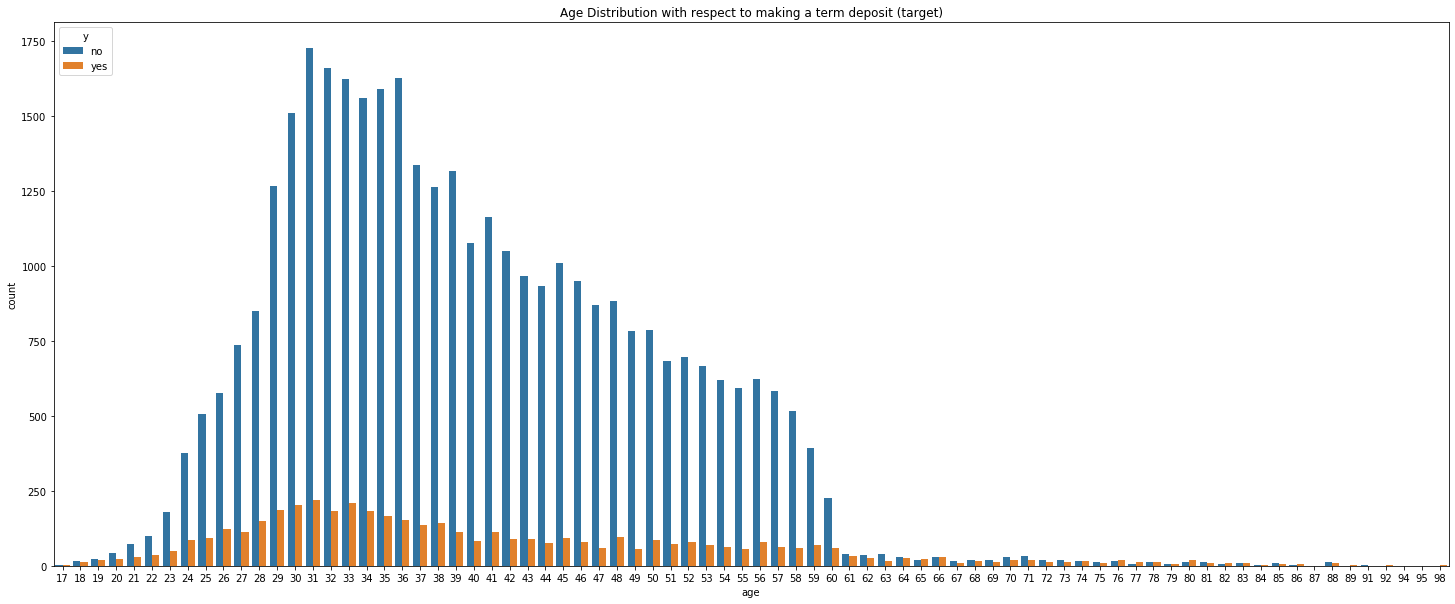

In [1094]:
plt.figure(figsize=(25,10))
sns.countplot(dt["age"],hue=dt["y"]).set_title("Age Distribution with respect to making a term deposit (target)")

Following plot shows the number of clients with their education level and whether they deposit the term deposit or not. It can be seen that clients who are highly educated (high school and university degree) are the highest number of people who make a term deposit when compared to other clients with other education level.

In [1095]:
ct=pd.crosstab(dt["education"],dt["y"])

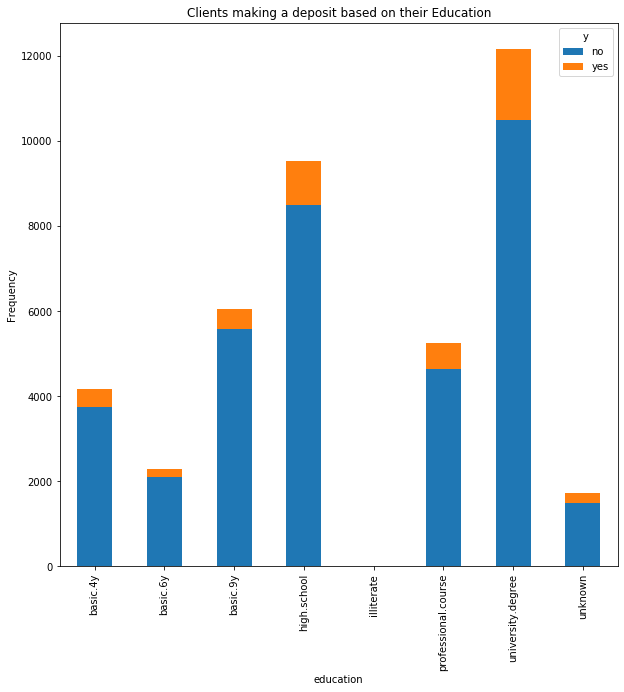

In [1096]:
ct.plot.bar(stacked=True,figsize=(10,10))
plt.title("Clients making a deposit based on their Education")
plt.ylabel("Frequency")
plt.show()

Following plot shows that people with personal loans don't make a term deposit in the bank. 

In [1097]:
ct=pd.crosstab(dt["loan"],dt["y"])

Text(0, 0.5, 'Frequency')

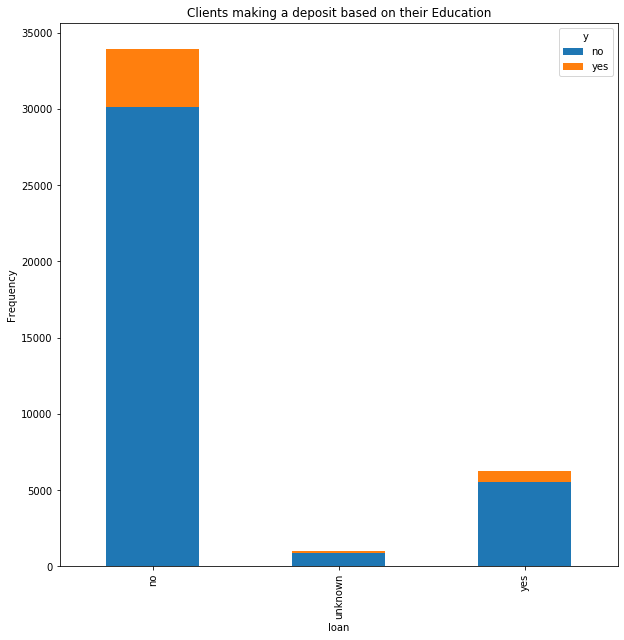

In [1098]:
ct.plot.bar(stacked=True,figsize=(10,10))
plt.title("Clients making a deposit based on their Education")
plt.ylabel("Frequency")


Below is an interesting visualization depicting that the higher the amount of time spent in contacting the client, the higher the chance of making a term deposit. The median of 'yes' class is clearly higher than the median of 'no' class.It can also be noted that there a lot of outliers in the 'duration' attribute. 

Text(0.5, 1.0, 'Making a term deposit VS Time spent on contacting the client')

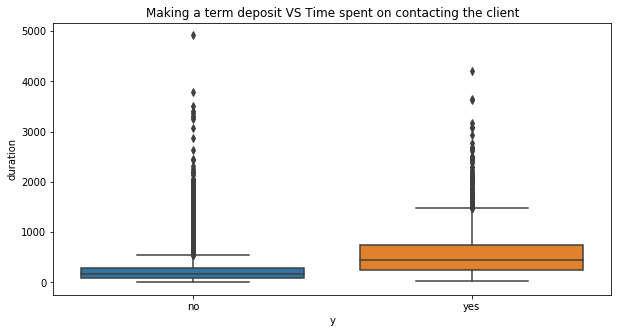

In [1099]:
plt.figure(figsize=(10,5))
sns.boxplot(x=dt["y"],y=dt["duration"]) .set_title("Making a term deposit VS Time spent on contacting the client")

There is a higher chance of a client making the term deposit if he/she was contacted in the last campaign. This relationship is clear from the below graph as well the correlation matrix generated previously in this notebook.

Text(0.5, 1.0, 'Poutcome VS Making a deposit')

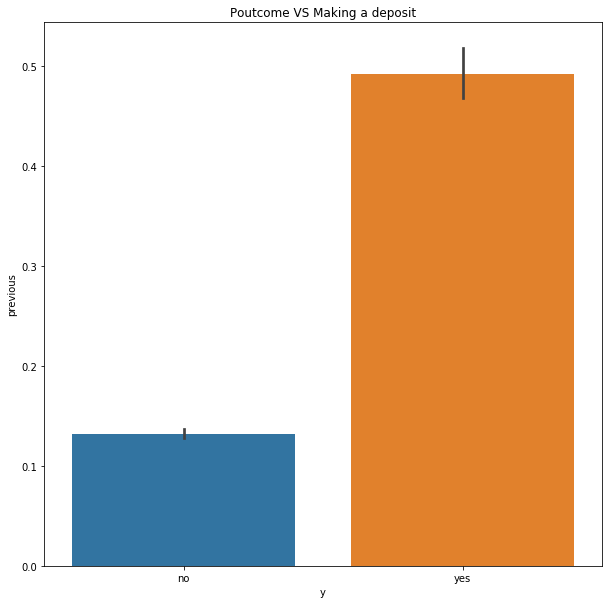

In [1100]:
fig=plt.figure(figsize=(10,10))
sns.barplot(x=dt["y"],y=dt["previous"]).set_title("Poutcome VS Making a deposit")

This is an intersting plot as well. It depicts the relationship between the client making a deposit and the duration a client contacts and the outcome of the previous campaign as well. Although it visualizes the same kind of relationship as in the last two plots, there is one difference which is the classes of the 'poutcome' variable. In the previous plot, we could not tell the outcome. We just had the count of clients contacted previously in the last campaign. Below graph shows that there is a significant number of clients who are likely to make a term deposit this campaign because they deposited in the last campaign as well. 

Text(0.5, 1, 'Duration VS Making a deposit')

<Figure size 720x720 with 0 Axes>

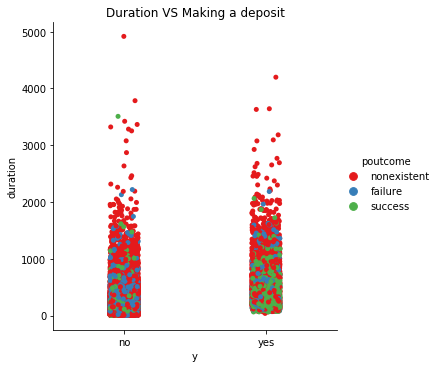

In [1101]:
fig=plt.figure(figsize=(10,10))
sns.catplot(x="y", y="duration",hue="poutcome",data=dt,palette=sns.color_palette("Set1"))
plt.title("Duration VS Making a deposit")

Checking for skewenss in the data. Skewness is a measure of  how asymmetric the data is about its mean value. The data can be left skewed and right skewed. For instance, the "campaign" data can be said to be skewed. Such data shouldn't be included in model training as it can bring a bias. One more think to note is there are approximately 40k clients with the same number of pdays. These 40k values have been imputed for missing values

/Users/ksaini/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


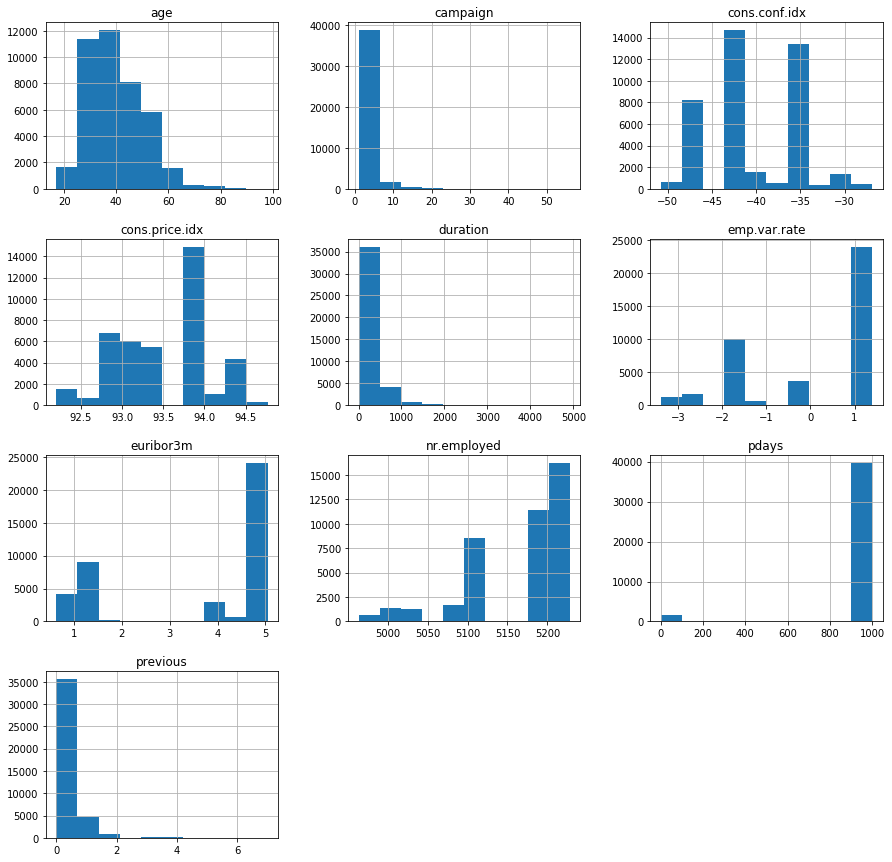

In [1102]:
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
dt.hist(ax=ax) 
plt.show()

Outliers can be determined by boxplots, IQR value, Z-score and scatter plots. I'm using the Z-scores method here. Z-score of each data point depicts how mant standard deviations away it is from the mean value. So, if the z-score is 3 times away from the mean value, the data point is considered as an outlier. 

In [1103]:
z=np.abs(ss.zscore(dt[num_cols]))
print(z)

[[1.53303429 0.01047142 0.56592197 ... 0.88644656 0.71245988 0.33167991]
 [1.62899323 0.42150051 0.56592197 ... 0.88644656 0.71245988 0.33167991]
 [0.29018564 0.12451981 0.56592197 ... 0.88644656 0.71245988 0.33167991]
 ...
 [1.53303429 0.26722482 0.20490853 ... 2.22495344 1.49518647 2.8156966 ]
 [0.38152696 0.70856893 0.56592197 ... 2.22495344 1.49518647 2.8156966 ]
 [3.26029527 0.07438021 0.15610492 ... 2.22495344 1.49518647 2.8156966 ]]


Here we set a threshold as 3. So, any data point beyond (threshold * mean) will be considered as an outlier (positive and negative). All those outliers are stored in a list 

In [1104]:
threshold=3
outliers=np.where(z>3)
outliers=list(outliers)

The outliers are stored in a dataframe. This dataframe will one row with the column index that would contain an outlier. For instance, the second row will be '0' for example, this means that there is one outlier in the 0th column of the main dataframe. The below plot shows that the initial columns don't contain many outliers when compared to the farther columns. 

In [1105]:
df=pd.DataFrame(outliers)
df=df.T
df.columns=["row","column"]
df=df.sort_values(by="column",axis=0) 
df=df.reset_index(drop=True)

Shows the distribution of the number of outliers in the rows of the dataframe.  

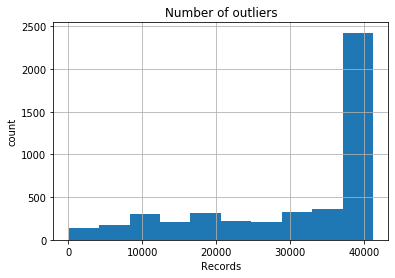

In [1106]:
df["row"].hist()
plt.title("Number of outliers")
plt.xlabel("Records")
plt.ylabel("count")
plt.show()

This graph shows the columns that have outliers. Education column seems to have the highest nummber of outliers.

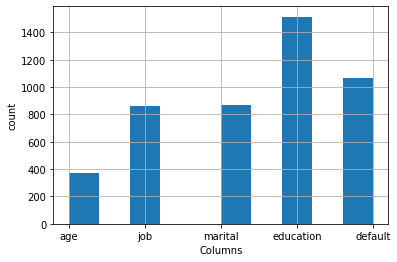

In [1107]:
df["column"].hist()
plt.xticks([0,1,2,3,4],dt[:df["column"].max()+1])
plt.xlabel("Columns")
plt.ylabel("count")
plt.show()

### Feature Engineering 

Check for skewness using skew function

In [1108]:
dt.skew(axis=0)

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

Log Transformation to remove the skewness

In [1109]:
dt["Log_duration"]=(dt["duration"]+1).transform(np.log)

In [1110]:
dt["Log_campaign"]=(dt["campaign"]+1).transform(np.log)

In [1111]:
dt["Log_pdays"]=(dt["pdays"]+1).transform(np.log)

In [1112]:
dt["Log_previous"]=(dt["previous"]+1).transform(np.log)

In [1113]:
dt["Log_nr.employed"]=(dt["nr.employed"]+1).transform(np.log)

Printing the histograms again

/Users/ksaini/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


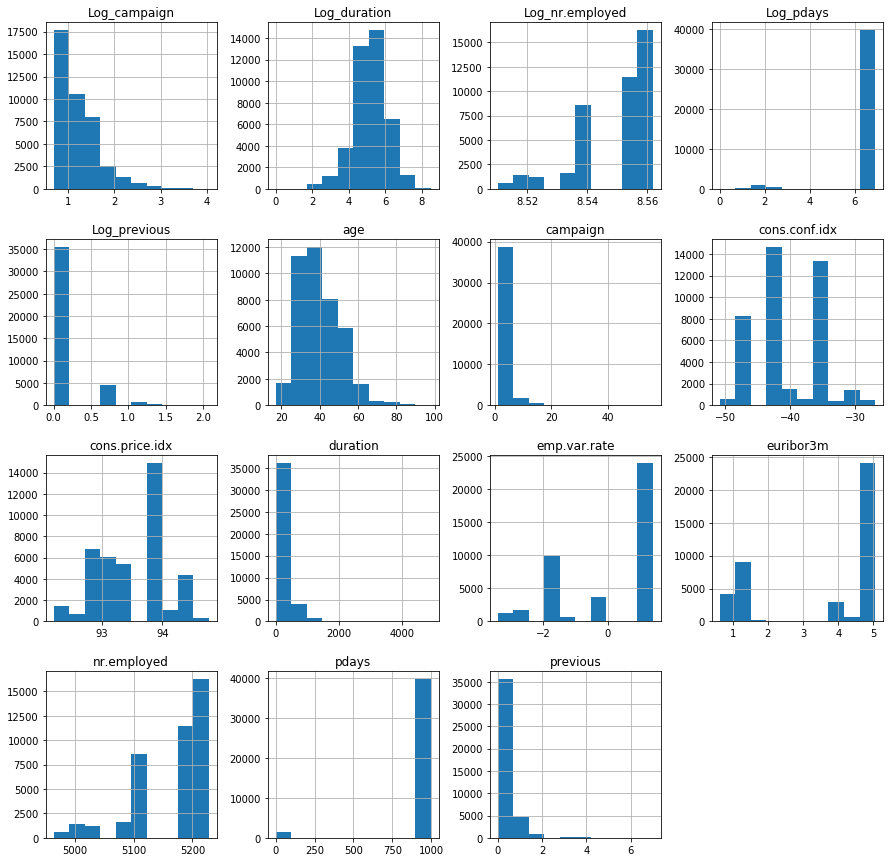

In [1114]:
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
dt.hist(ax=ax) 
plt.show()

Checking the skewness of data again. We can see that the skewness is not entirely eliminated but it is definitely reduced.

In [1115]:
dt.skew(axis=0)

age                0.784697
duration           3.263141
campaign           4.762507
pdays             -4.922190
previous           3.832042
emp.var.rate      -0.724096
cons.price.idx    -0.230888
cons.conf.idx      0.303180
euribor3m         -0.709188
nr.employed       -1.044262
Log_duration      -0.421327
Log_campaign       1.350403
Log_pdays         -5.006022
Log_previous       2.587040
Log_nr.employed   -1.063661
dtype: float64

Following statements update the original dataframe

In [1116]:
dt=dt.drop(["campaign","pdays","previous","nr.employed","duration"],axis=1)

In [1117]:
dt.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y', 'Log_duration',
       'Log_campaign', 'Log_pdays', 'Log_previous', 'Log_nr.employed'],
      dtype='object')

In [1118]:
dt.describe()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,Log_duration,Log_campaign,Log_pdays,Log_previous,Log_nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.081886,93.575664,-40.502600,3.621291,5.173036,1.118991,6.720450,0.107943,8.550149
std,10.42125,1.570960,0.578840,4.628198,1.734447,0.916938,0.491402,0.963613,0.283014,0.014086
min,17.00000,-3.400000,92.201000,-50.800000,0.634000,0.000000,0.693147,0.000000,0.000000,8.510088
25%,32.00000,-1.800000,93.075000,-42.700000,1.344000,4.634729,0.693147,6.907755,0.000000,8.537015
50%,38.00000,1.100000,93.749000,-41.800000,4.857000,5.198497,1.098612,6.907755,0.000000,8.554874
75%,47.00000,1.400000,93.994000,-36.400000,4.961000,5.768321,1.386294,6.907755,0.000000,8.561994
max,98.00000,1.400000,94.767000,-26.900000,5.045000,8.500861,4.043051,6.907755,2.079442,8.561994


In [1119]:
dt.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,Log_duration,Log_campaign,Log_pdays,Log_previous,Log_nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,no,5.568345,0.693147,6.907755,0.0,8.554874
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,no,5.010635,0.693147,6.907755,0.0,8.554874
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,no,5.424950,0.693147,6.907755,0.0,8.554874
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,no,5.023881,0.693147,6.907755,0.0,8.554874
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,no,5.730100,0.693147,6.907755,0.0,8.554874


It can be noted that not all the data lie in the same range. In order to nullify the difference, standardization is performed on the numeric data

In [1120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dt[["age","emp.var.rate","cons.conf.idx",
                                       "cons.price.idx",
                                      "euribor3m","Log_duration",
                                      "Log_campaign","Log_pdays",
                                      "Log_previous",
                                       "Log_nr.employed"]]) 

In [1121]:
scaled_data=pd.DataFrame(scaled_data)
scaled_data.columns=["age","emp.var.rate","cons.conf.idx",
                                       "cons.price.idx",
                                      "euribor3m","Log_duration",
                                      "Log_campaign","Log_pdays",
                                      "Log_previous","Log_nr.employed"]

In [1122]:
scaled_data

,age,emp.var.rate,cons.conf.idx,cons.price.idx,euribor3m,Log_duration,Log_campaign,Log_pdays,Log_previous,Log_nr.employed
0,1.533034,0.648092,0.886447,0.722722,0.712460,0.431124,-0.866600,0.194381,-0.381410,0.33545
1,1.628993,0.648092,0.886447,0.722722,0.712460,-0.177114,-0.866600,0.194381,-0.381410,0.33545
2,-0.290186,0.648092,0.886447,0.722722,0.712460,0.274738,-0.866600,0.194381,-0.381410,0.33545
3,-0.002309,0.648092,0.886447,0.722722,0.712460,-0.162669,-0.866600,0.194381,-0.381410,0.33545
4,1.533034,0.648092,0.886447,0.722722,0.712460,0.607534,-0.866600,0.194381,-0.381410,0.33545
...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,-0.752343,-2.224953,2.058168,-1.495186,0.699178,-0.866600,0.194381,-0.381410,-2.84416
41184,0.573445,-0.752343,-2.224953,2.058168,-1.495186,0.848058,-0.866600,0.194381,-0.381410,-2.84416
41185,1.533034,-0.752343,-2.224953,2.058168,-1.495186,0.080692,-0.041472,0.194381,-0.381410,-2.84416
41186,0.381527,-0.752343,-2.224953,2.058168,-1.495186,1.003934,-0.866600,0.194381,-0.381410,-2.84416


Following statements update the dataframe

In [1123]:
temp=dt.drop(["age","emp.var.rate","cons.conf.idx",
                                       "cons.price.idx",
                                      "euribor3m","Log_duration",
                                      "Log_campaign","Log_pdays",
                                      "Log_previous","Log_nr.employed"],axis=1)

In [1124]:
dt_final=pd.concat([temp,scaled_data],axis=1)

In [1125]:
dt_final.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,age,emp.var.rate,cons.conf.idx,cons.price.idx,euribor3m,Log_duration,Log_campaign,Log_pdays,Log_previous,Log_nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,...,1.533034,0.648092,0.886447,0.722722,0.71246,0.431124,-0.8666,0.194381,-0.38141,0.33545
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,...,1.628993,0.648092,0.886447,0.722722,0.71246,-0.177114,-0.8666,0.194381,-0.38141,0.33545
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,...,-0.290186,0.648092,0.886447,0.722722,0.71246,0.274738,-0.8666,0.194381,-0.38141,0.33545
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,...,-0.002309,0.648092,0.886447,0.722722,0.71246,-0.162669,-0.8666,0.194381,-0.38141,0.33545
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,...,1.533034,0.648092,0.886447,0.722722,0.71246,0.607534,-0.8666,0.194381,-0.38141,0.33545


In [1126]:
dt_final.shape

(41188, 21)

In [1127]:
dt_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job              41188 non-null  object 
 1   marital          41188 non-null  object 
 2   education        41188 non-null  object 
 3   default          41188 non-null  object 
 4   housing          41188 non-null  object 
 5   loan             41188 non-null  object 
 6   contact          41188 non-null  object 
 7   month            41188 non-null  object 
 8   day_of_week      41188 non-null  object 
 9   poutcome         41188 non-null  object 
 10  y                41188 non-null  object 
 11  age              41188 non-null  float64
 12  emp.var.rate     41188 non-null  float64
 13  cons.conf.idx    41188 non-null  float64
 14  cons.price.idx   41188 non-null  float64
 15  euribor3m        41188 non-null  float64
 16  Log_duration     41188 non-null  float64
 17  Log_campaign

Next, all the categorical data needs to be One Hot Encoded. A separte column will be created for each category. The target variable is label encoded.

Checking the categories of the features

In [1128]:
dt_final["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [1129]:
dt_final["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [1130]:
dt_final["contact"].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [1131]:
dt_final["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

One Hot Encoding the features

In [1132]:
strin=strin[:-1]
dummies=pd.get_dummies(dt_final,columns=strin)
dummies.shape

(41188, 64)

In [1133]:
dummies

,y,age,emp.var.rate,cons.conf.idx,cons.price.idx,euribor3m,Log_duration,Log_campaign,Log_pdays,Log_previous,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,no,1.533034,0.648092,0.886447,0.722722,0.712460,0.431124,-0.866600,0.194381,-0.381410,...,0,0,0,1,0,0,0,0,1,0
1,no,1.628993,0.648092,0.886447,0.722722,0.712460,-0.177114,-0.866600,0.194381,-0.381410,...,0,0,0,1,0,0,0,0,1,0
2,no,-0.290186,0.648092,0.886447,0.722722,0.712460,0.274738,-0.866600,0.194381,-0.381410,...,0,0,0,1,0,0,0,0,1,0
3,no,-0.002309,0.648092,0.886447,0.722722,0.712460,-0.162669,-0.866600,0.194381,-0.381410,...,0,0,0,1,0,0,0,0,1,0
4,no,1.533034,0.648092,0.886447,0.722722,0.712460,0.607534,-0.866600,0.194381,-0.381410,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,yes,3.164336,-0.752343,-2.224953,2.058168,-1.495186,0.699178,-0.866600,0.194381,-0.381410,...,0,0,1,0,0,0,0,0,1,0
41184,no,0.573445,-0.752343,-2.224953,2.058168,-1.495186,0.848058,-0.866600,0.194381,-0.381410,...,0,0,1,0,0,0,0,0,1,0
41185,no,1.533034,-0.752343,-2.224953,2.058168,-1.495186,0.080692,-0.041472,0.194381,-0.381410,...,0,0,1,0,0,0,0,0,1,0
41186,yes,0.381527,-0.752343,-2.224953,2.058168,-1.495186,1.003934,-0.866600,0.194381,-0.381410,...,0,0,1,0,0,0,0,0,1,0


In [1134]:
dt=dummies

Label Encoding the target variable

In [1135]:
label = preprocessing.LabelEncoder()
dt["y"]=label.fit_transform(dt["y"])

In [1136]:
dt.head()

,y,age,emp.var.rate,cons.conf.idx,cons.price.idx,euribor3m,Log_duration,Log_campaign,Log_pdays,Log_previous,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1.533034,0.648092,0.886447,0.722722,0.71246,0.431124,-0.8666,0.194381,-0.38141,...,0,0,0,1,0,0,0,0,1,0
1,0,1.628993,0.648092,0.886447,0.722722,0.71246,-0.177114,-0.8666,0.194381,-0.38141,...,0,0,0,1,0,0,0,0,1,0
2,0,-0.290186,0.648092,0.886447,0.722722,0.71246,0.274738,-0.8666,0.194381,-0.38141,...,0,0,0,1,0,0,0,0,1,0
3,0,-0.002309,0.648092,0.886447,0.722722,0.71246,-0.162669,-0.8666,0.194381,-0.38141,...,0,0,0,1,0,0,0,0,1,0
4,0,1.533034,0.648092,0.886447,0.722722,0.71246,0.607534,-0.8666,0.194381,-0.38141,...,0,0,0,1,0,0,0,0,1,0


In [1137]:
dt["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

### Modelling 

Splitting the data into the train set and test set. The train data is then again split into validation and train set. All the models need to be predicted on the validation dataset and trained on the training set. The target variable is split with a stratified strategy. This will ensure that the target classes are split almost equally in the datasets 

In [1138]:
X=dt.drop(["y"],axis=1)
y=dt["y"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,
                                             random_state=42,train_size=0.8,
                                             stratify=y_train)

In [1139]:
X_train.shape

(26360, 63)

In [1140]:
X_val.shape

(6590, 63)

Classification Models Applied: 
    1. Logistic Regression
    2. K-NN algorithm
    3. Decision Tree 

### Logistic Regression

Logistic Regression is a binary classification algorithm. It predicts the probabilities of the occurence of a target variable. Higher the probability of the class, higher is the chance of its occurence. Logistic Regression method is implemented from the sklearn package. The solver hyperparameter is the algorithm to be used for optimization.

In [1141]:
model = LogisticRegression(solver='liblinear', random_state=0) 
model.fit(X_train,y_train)  #the model is fit on the training dataset 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Following are the coefficients of the features. The higher the value, higher the positive corelation with the model 

In [1142]:
predictions=model.predict(X_val) #predicting on the validation set 

In [1143]:
print("Accuracy: "+str(metrics.accuracy_score(y_val,predictions)))

Accuracy: 0.9078907435508345


Cross Val score is the score for the validation sets.  We choose cv=3. So, we get scores for 3 validation sets

In [1144]:
print("Cross Validation Score: "+str(cross_val_score(model, X_train, y_train, cv=3)))

Cross Validation Score: [0.90554228 0.91589849 0.91065331]


The following plot shows the top 10 features. It us to be noted that the coefficients are negative which means that the features negatively impact the model. If the value of the feature increases

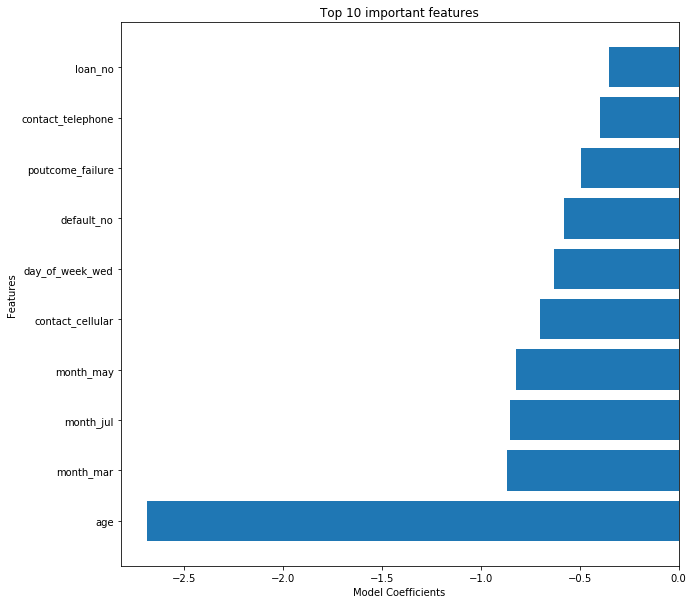

In [1145]:
features=dt.columns
plt.figure(figsize=(10,10))
imp=np.array(model.coef_).flatten()
indices=np.argsort(imp)[0:10]
plt.barh(range(len(indices)),imp[indices])
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.title("Top 10 important features")
plt.xlabel("Model Coefficients")
plt.ylabel("Features")
plt.show()

In [1146]:
probabilities=model.predict_proba(X_val)[:,1] #probabilities of the classes

The classification matrix shows an accuracy of 0.91 percent. 

In [1147]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5848
           1       0.64      0.42      0.51       742

    accuracy                           0.91      6590
   macro avg       0.78      0.70      0.73      6590
weighted avg       0.90      0.91      0.90      6590



Below is the confusion matrix. We can see that there are almost 5.6k correctly predicted outcomes

In [1148]:
confusion_matrix(y_val, predictions)

array([[5669,  179],
       [ 428,  314]])

Calculating the AUC score of the model. AUC score lies between 0 and 1. A good performing model has a score closer to 1. The model built above has a score of 0.93. 

In [1149]:
fpr,tpr,thresholds=roc_curve(y_val,probabilities)
print("AUC score: "+str(roc_auc_score(y_val,probabilities))) 

AUC score: 0.9373008856899496


Plotting the ROC curve.
ROC plot is a graph of False Positive Rate VS True Positive Rate. An ideal model has the line of curve at the upper left corner (grey line in the below plot) and the worst performing model will have a straight line passing the origin. The model built above has its line of curve approaching the left top corner. This depicts that the model is a good performing model. 

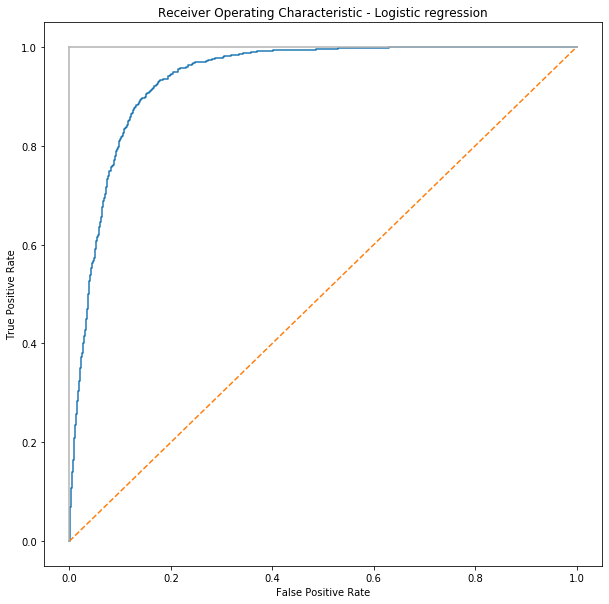

In [1150]:
plt.subplots(1, figsize=(10,10)) #setting up the plot size
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### K-NN Algorithm

K-NN algorithm classifies the 'k'nearest data points as one class. Choosing an optimal 'k' value is important. Below is the code that records the accuracy score of the KNN model for 25 'k' values and plots accuracy VS k value. The 'k' value producing the highest sccore can then be chosen to build the model. 

In [1151]:
k_values=range(1,26)
scores={}
scores_list=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    predictions=knn.predict(X_val)
    scores[k]=metrics.accuracy_score(y_val,predictions)
    scores_list.append(metrics.accuracy_score(y_val,predictions))

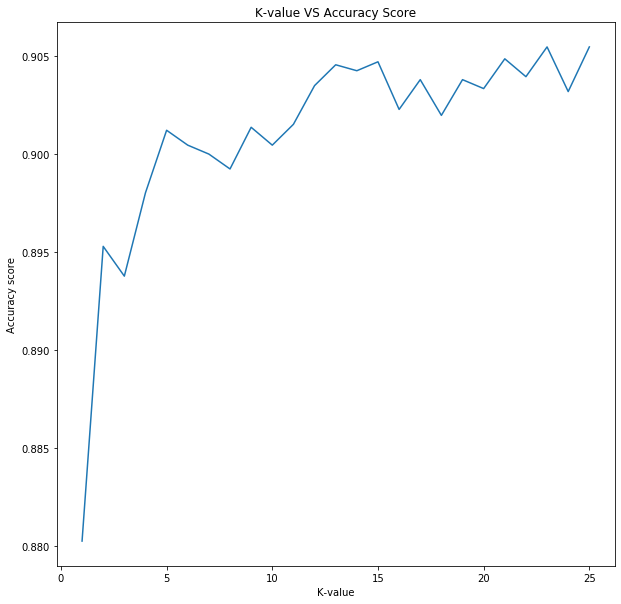

In [1152]:
plt.figure(figsize=(10,10))
plt.plot(k_values,scores_list)
plt.title("K-value VS Accuracy Score")
plt.xlabel("K-value")
plt.ylabel("Accuracy score")
plt.show()

The best k value is 25 here. So, the below model is implemented with k=25

In [1153]:
knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
predictions=knn.predict(X_val)

In [1154]:
print("Accuracy: "+str(metrics.accuracy_score(y_val,predictions)))

Accuracy: 0.9054628224582701


In [1155]:
print("Cross Validation Score: "+str(cross_val_score(knn, X_train, y_train, cv=3)))

Cross Validation Score: [0.9009901  0.90508706 0.90439335]


In [1156]:
probabilities=knn.predict_proba(X_val)[:,1] #Getting the probabilities of the target variable

In [1157]:
fpr,tpr,thresholds=roc_curve(y_val,probabilities) #storing the true positive rate, false positive rate & thresholds
print("AUC score:"+str(roc_auc_score(y_val,probabilities)))  #getting the accuracy score

AUC score:0.9214427214501422


In [1158]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5848
           1       0.69      0.29      0.41       742

    accuracy                           0.91      6590
   macro avg       0.80      0.64      0.68      6590
weighted avg       0.89      0.91      0.89      6590



In [1159]:
confusion_matrix(y_val, predictions)

array([[5751,   97],
       [ 526,  216]])

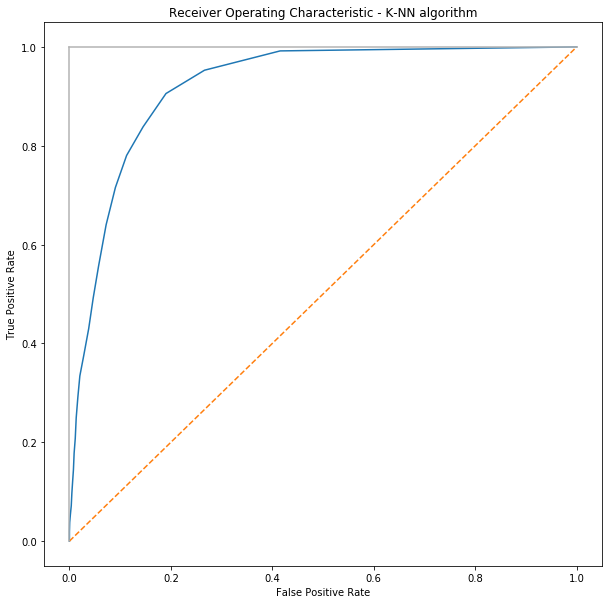

In [1160]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - K-NN algorithm')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--") # this line of curve is the worst performing mondel 
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7") #this line of curve if for the best performing model
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree Algorithm

Decision Tree is a tree based model where it splits the data into nodes that are generated using classification rules and target variable is the leaf node. Few imortant metrics while generating the tree are : criterion, max_depth and min_samples_split. 
'Criterion' is the measure of the quality of a split. 'Max_depth' is the maximum depth of the tree and 'min_samples_split' is the minimum number of features required to make a split. 
This algorithm is also implemented from the sklearn package.

In [1161]:
dt_clf=DecisionTreeClassifier() #creating a model object
dt_clf.fit(X_train,y_train)  #Fitting on the training set
predictions=clf.predict(X_val)  #predicting on the validation set

In [1162]:
print("Accuracy: "+str(metrics.accuracy_score(y_val,predictions)))

Accuracy: 0.908649468892261


In order to optimize the hyper parameters, GridSearchCV is implemented. It takes the all possible values of all hyper parameter and builds the model using all the combinations of the values. Best scores and best parameters can be then be used to build the model again with the optimized set of hyper parameters

In [1163]:
estimator=DecisionTreeClassifier()
grid_param={
    "criterion":["gini","entropy"],
    "max_depth":[50,100,150,200,250],
    "min_samples_split":[50,100,150,200]
    }
grid=GridSearchCV(estimator,grid_param)
grid_search=grid.fit(X_train,y_train)
print("Best Score:"+ str(grid_search.best_score_))
print("Best Parameters: "+str(grid_search.best_params_))

Best Score:0.9094461305007588
Best Parameters: {'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 200}


Building the model again with the optimized set of parameters

In [1164]:
dt_clf=DecisionTreeClassifier(criterion="entropy",max_depth=100,min_samples_split=200)
clf=dt_clf.fit(X_train,y_train)
predictions=clf.predict(X_val)

In [1165]:
print("Accuracy: "+str(metrics.accuracy_score(y_val,predictions)))

Accuracy: 0.908649468892261


In [1166]:
print("Cross Validation Score: "+str(cross_val_score(dt_clf, X_train, y_train, cv=3)))

Cross Validation Score: [0.90895641 0.9111187  0.90974277]


In [1167]:
probabilities=dt_clf.predict_proba(X_val)[:,1] #getting the probabilites of target class

In [1168]:
fpr,tpr,thresholds=roc_curve(y_val,probabilities)
print("AUC Score: "+ str(roc_auc_score(y_val,probabilities))) 

AUC Score: 0.9349831859027069


In [1169]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5848
           1       0.62      0.49      0.55       742

    accuracy                           0.91      6590
   macro avg       0.78      0.73      0.75      6590
weighted avg       0.90      0.91      0.90      6590



In [1170]:
confusion_matrix(y_val, predictions)

array([[5622,  226],
       [ 376,  366]])

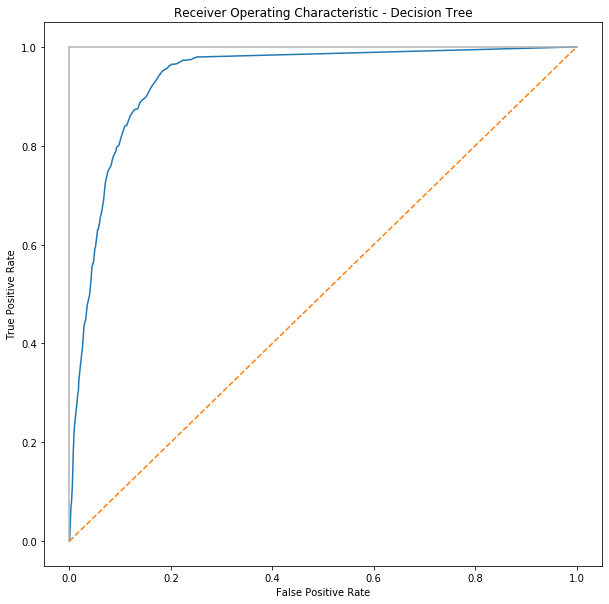

In [1171]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Building the best performing model among the above three algorithms for the test data now. On examining the performance metrics, it can be said that Logistic Regression classifies the best. 

In [1172]:
dt_clf=DecisionTreeClassifier(criterion="entropy",max_depth=200,min_samples_split=200)
clf=dt_clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7310
           1       0.66      0.52      0.58       928

    accuracy                           0.92      8238
   macro avg       0.80      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238



In [1173]:
print("Accuracy: "+str(metrics.accuracy_score(y_test,predictions)))

Accuracy: 0.9153920854576354


In [1174]:
probabilities=dt_clf.predict_proba(X_val)[:,1] #getting the probabilites of target class
fpr,tpr,thresholds=roc_curve(y_val,probabilities)
print("AUC Score: "+ str(roc_auc_score(y_val,probabilities))) 

AUC Score: 0.9349831859027069


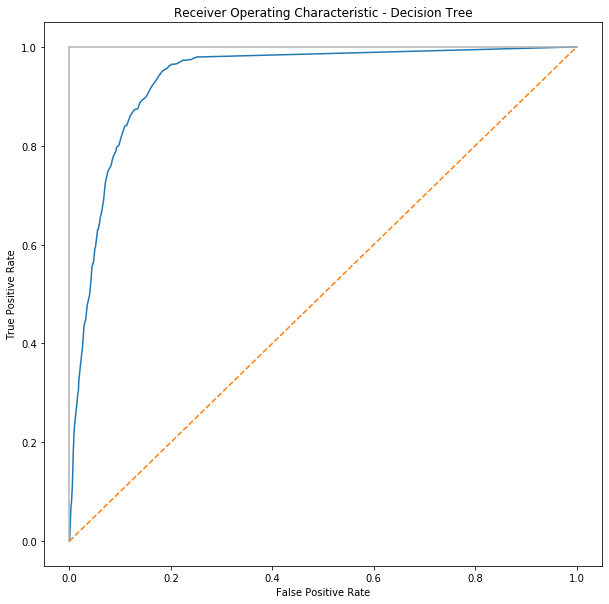

In [1175]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()